# Step 1: Import Libraries. 

In [1]:
#import libraries for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Import the Dataset.

In [2]:
df=pd.read_csv('transfusion.csv')

In [3]:
df.shape

(748, 6)

In [4]:
df.head()

,Unnamed: 0,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,HSZ1,2.0,50,12500,98,yes
1,HSZ2,0.0,13,3250,28,yes
2,HSZ3,1.0,16,4000,35,yes
3,HSZ4,2.0,20,5000,45,yes
4,HSZ5,1.0,24,6000,77,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  748 non-null    object 
 1   Recency (months)                            744 non-null    float64
 2   Frequency (times)                           748 non-null    int64  
 3   Monetary (c.c. blood)                       748 non-null    int64  
 4   Time (months)                               748 non-null    int64  
 5   whether he/she donated blood in March 2007  748 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 35.2+ KB


# Edit the Dataset

In [6]:
df.rename(columns = {'Unnamed: 0': 'Donor_id','Recency (months)': 'Recency',
                     'Frequency (times)': 'Frequency',
                     'Monetary (c.c. blood)': 'Monetary','Time (months)':'Time',
                     'whether he/she donated blood in March 2007': 'target'},inplace=True)

In [7]:
df.columns

Index(['Donor_id', 'Recency', 'Frequency', 'Monetary', 'Time', 'target'], dtype='object')

In [8]:
df

,Donor_id,Recency,Frequency,Monetary,Time,target
0,HSZ1,2.0,50,12500,98,yes
1,HSZ2,0.0,13,3250,28,yes
2,HSZ3,1.0,16,4000,35,yes
3,HSZ4,2.0,20,5000,45,yes
4,HSZ5,1.0,24,6000,77,no
...,...,...,...,...,...,...
743,HSZ744,23.0,2,500,38,no
744,HSZ745,21.0,2,500,52,no
745,HSZ746,23.0,3,750,62,no
746,HSZ747,39.0,1,250,39,no


# Step 3: Taking care of Missing Data in Dataset.

In [9]:
df.isnull().any()

Donor_id     False
Recency       True
Frequency    False
Monetary     False
Time         False
target       False
dtype: bool

In [10]:
df['Recency'].isnull().sum()

4

In [11]:
missing_values_rows = df[df.isnull().any(axis=1)]
print(missing_values_rows)

    Donor_id  Recency  Frequency  Monetary  Time target
14     HSZ15      NaN          6      1500    15    yes
495   HSZ496      NaN          3       750    64     no
718   HSZ719      NaN          3       750    35     no
742   HSZ743      NaN          3       750    86     no


In [12]:
df['Recency']=df['Recency'].fillna(df['Recency'].mean()) 

In [13]:
df.isnull().any()

Donor_id     False
Recency      False
Frequency    False
Monetary     False
Time         False
target       False
dtype: bool

# Step 4: Encoding categorical data.

In [14]:
print('Categorical Columns are ','\n',list(df.select_dtypes(include='object')),'\n')
print('Numerical Columns are ','\n',list(df.select_dtypes(exclude='object')))

Categorical Columns are  
 ['Donor_id', 'target'] 

Numerical Columns are  
 ['Recency', 'Frequency', 'Monetary', 'Time']


In [15]:
# Convert target value to 0 and 1
df["target"] = df["target"].map({"no": 0, "yes":1})

In [16]:
df['target']

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: target, Length: 748, dtype: int64

# View Dataset

In [17]:
df.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

In [18]:
df.shape

(748, 6)

In [19]:
df.head()

,Donor_id,Recency,Frequency,Monetary,Time,target
0,HSZ1,2.0,50,12500,98,1
1,HSZ2,0.0,13,3250,28,1
2,HSZ3,1.0,16,4000,35,1
3,HSZ4,2.0,20,5000,45,1
4,HSZ5,1.0,24,6000,77,0


In [20]:
df.tail()

,Donor_id,Recency,Frequency,Monetary,Time,target
743,HSZ744,23.0,2,500,38,0
744,HSZ745,21.0,2,500,52,0
745,HSZ746,23.0,3,750,62,0
746,HSZ747,39.0,1,250,39,0
747,HSZ748,72.0,1,250,72,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Donor_id   748 non-null    object 
 1   Recency    748 non-null    float64
 2   Frequency  748 non-null    int64  
 3   Monetary   748 non-null    int64  
 4   Time       748 non-null    int64  
 5   target     748 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 35.2+ KB


In [22]:
df.describe()

,Recency,Frequency,Monetary,Time,target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.458333,5.514706,1378.676471,34.282086,0.237968
std,8.022117,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,7.500000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# 2. EDA/Visualisation

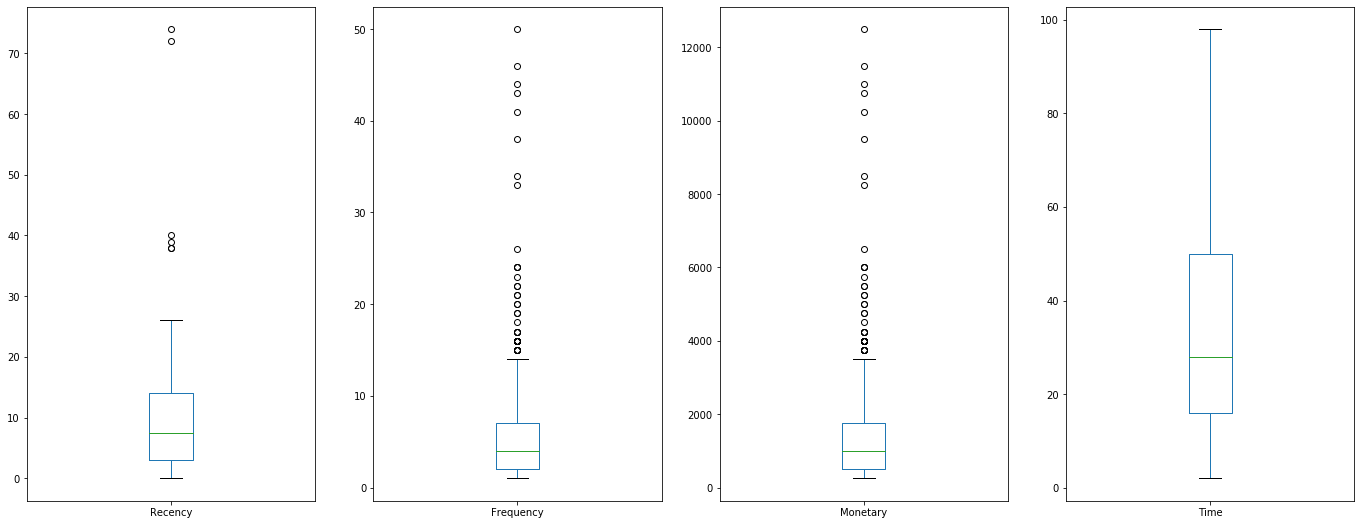

In [23]:
df.drop('target',axis=1).plot(kind='box',layout=(2,5),subplots=True,figsize=(30,20))
plt.show()

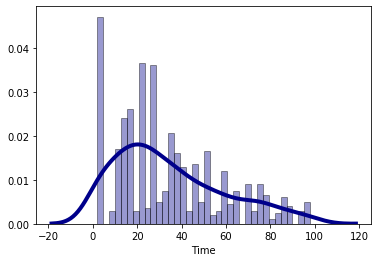

In [24]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Time'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

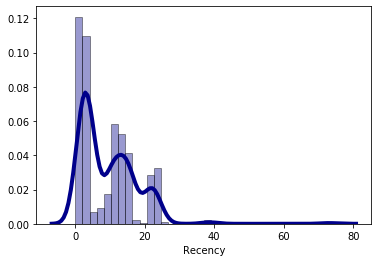

In [25]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Recency'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

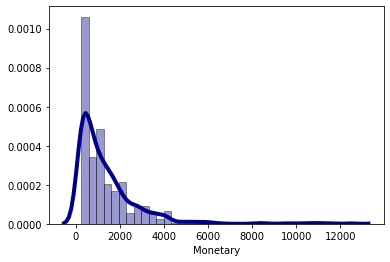

In [26]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Monetary'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

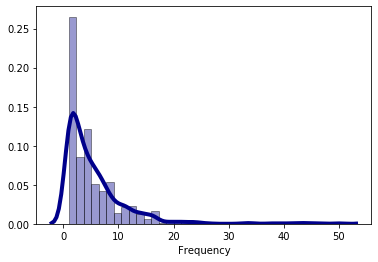

In [27]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Frequency'], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

The maximum frequency is 50
The minimum frequency is 1


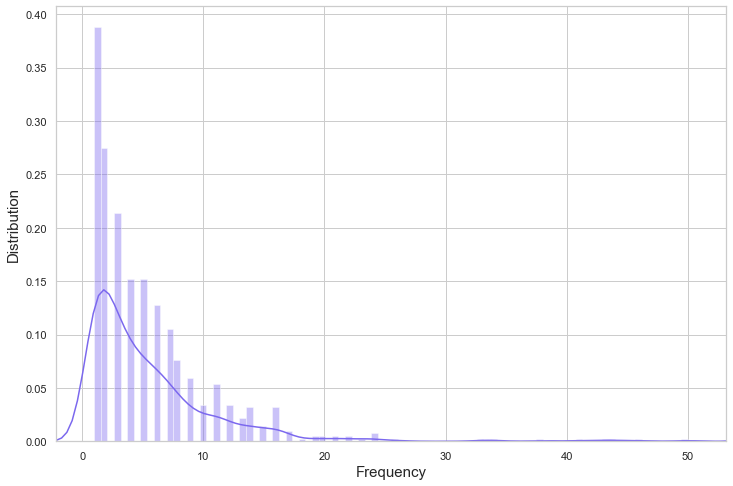

In [28]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['Frequency'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Frequency", fontsize = 15)
plt.margins(x = 0)

print ("The maximum frequency is", df['Frequency'].max())
print ("The minimum frequency is", df['Frequency'].min())

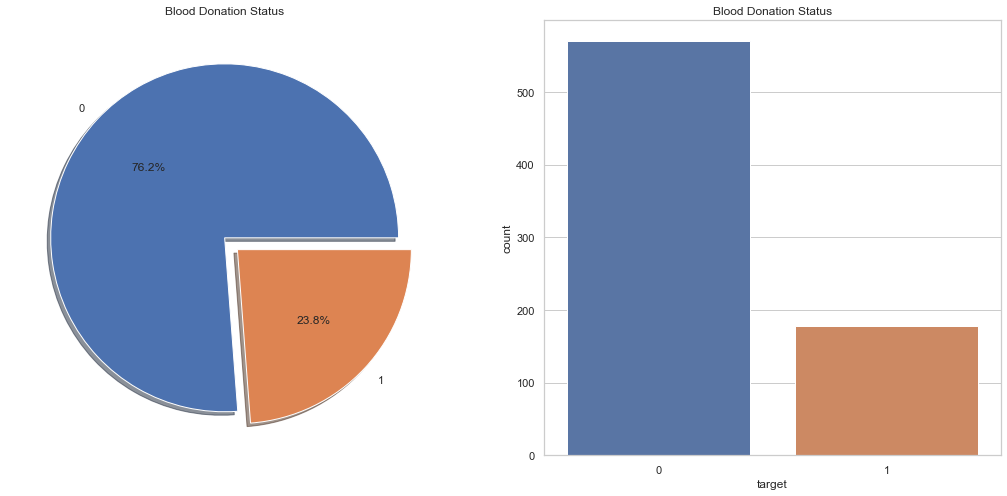

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Blood Donation Status')
ax[0].set_ylabel('')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('Blood Donation Status')
plt.show()

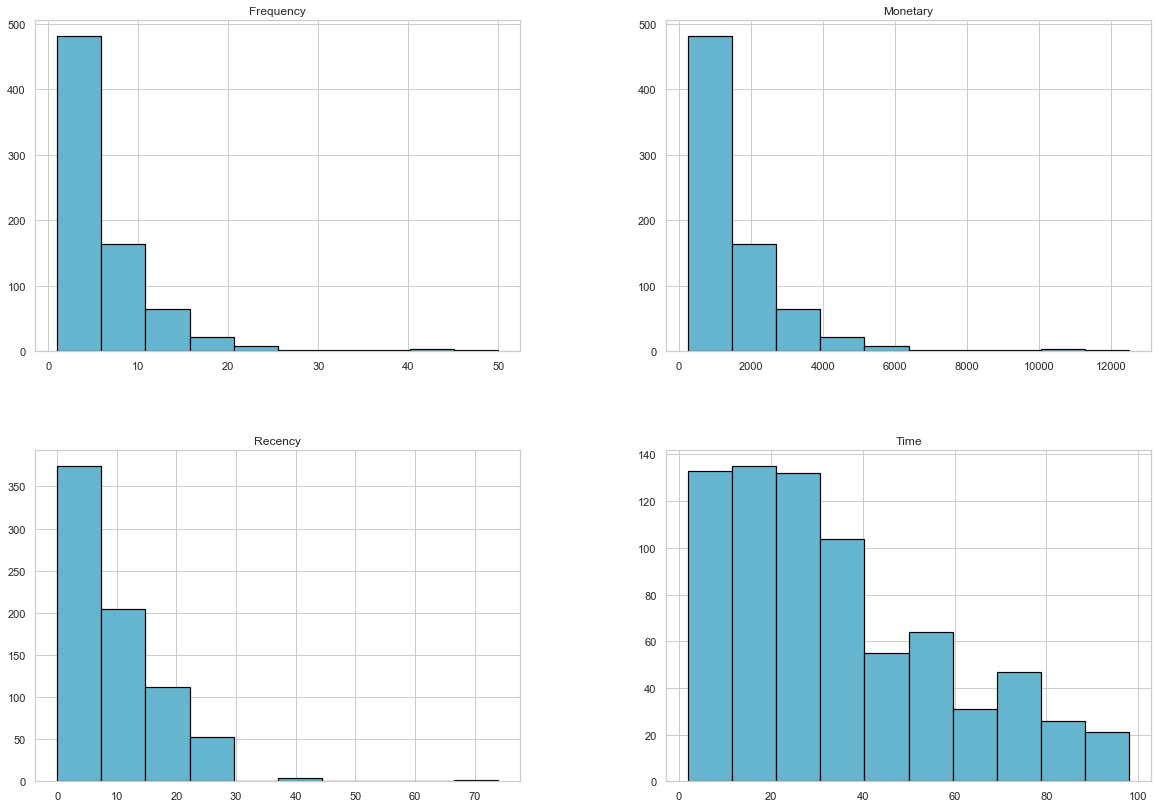

In [30]:
# Distribution of Different Features of the Dataset
d1=df.drop(['target'], axis=1)
distribution = d1.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.show()

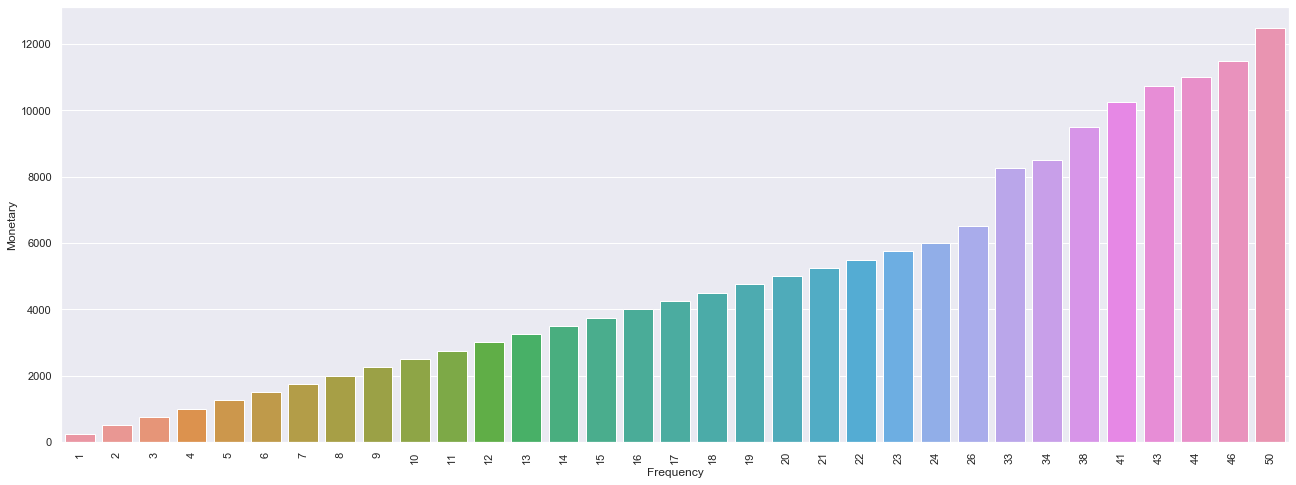

In [31]:
# This shows the total amount/volume of blood donated according to the frequency of the blood donation
sns.set(rc={'figure.figsize':(22,8)})
sns_grad = sns.barplot(x = df['Frequency'], y = df['Monetary'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

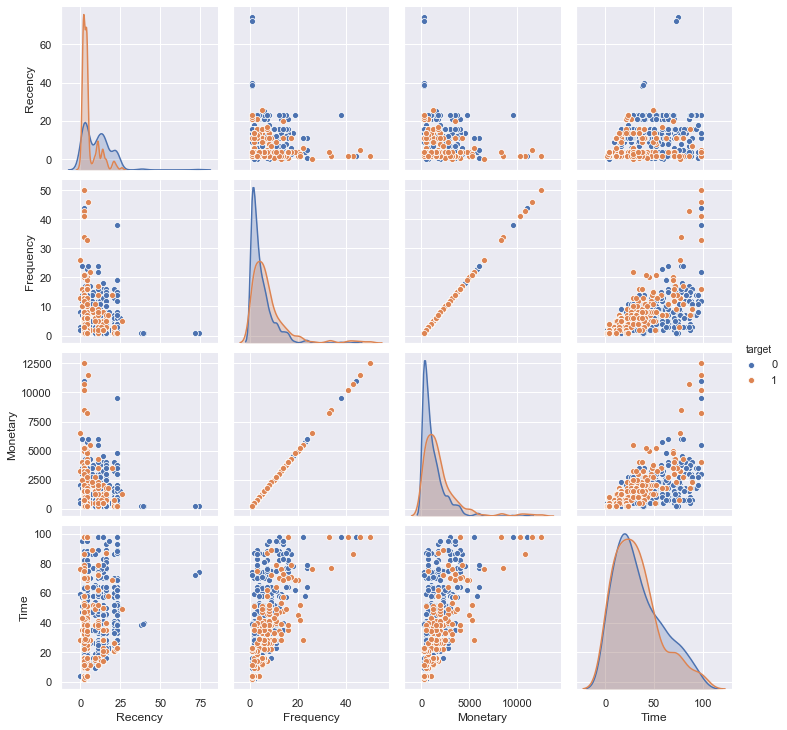

In [32]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='target')

Text(0.5, 1.05, 'Correlation of Blood Donation Status')

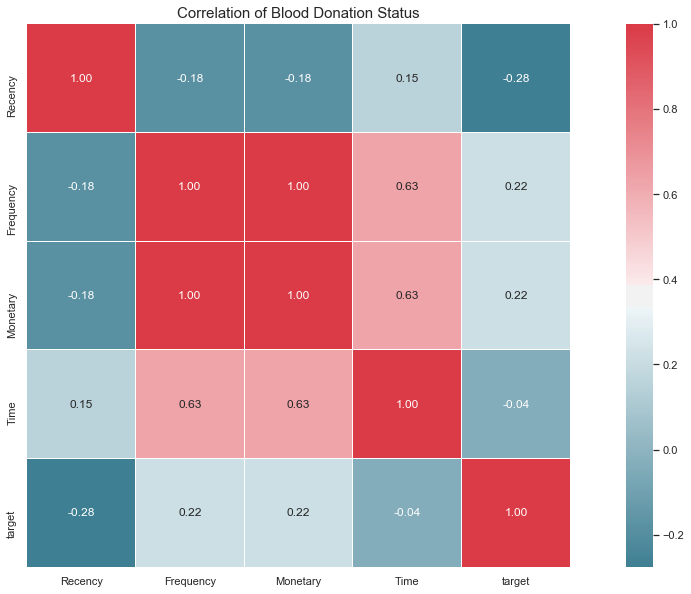

In [33]:
corr = df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Blood Donation Status', y=1.05, size=15) 

# Features Selection

In [34]:
x = df[['Recency','Frequency','Monetary','Time']]
x

,Recency,Frequency,Monetary,Time
0,2.0,50,12500,98
1,0.0,13,3250,28
2,1.0,16,4000,35
3,2.0,20,5000,45
4,1.0,24,6000,77
...,...,...,...,...
743,23.0,2,500,38
744,21.0,2,500,52
745,23.0,3,750,62
746,39.0,1,250,39


In [35]:
y = df[['target']]
y

,target
0,1
1,1
2,1
3,1
4,0
...,...
743,0
744,0
745,0
746,0


# Split dataset

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.30)

In [37]:
x_train

,Recency,Frequency,Monetary,Time
242,4.0,3,750,25
533,2.0,4,1000,14
315,4.0,2,500,29
12,2.0,10,2500,28
161,2.0,1,250,2
...,...,...,...,...
707,11.0,4,1000,74
192,2.0,4,1000,35
629,7.0,11,2750,89
559,3.0,8,2000,50


In [38]:
y_train

,target
242,1
533,0
315,0
12,1
161,0
...,...
707,0
192,0
629,0
559,0


# Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Regression Analysis

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression()

In [43]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_log = log_reg.predict(x_test)

In [45]:
cm_log = confusion_matrix(y_test,y_pred_log)
print(cm_log)

[[161   3]
 [ 55   6]]


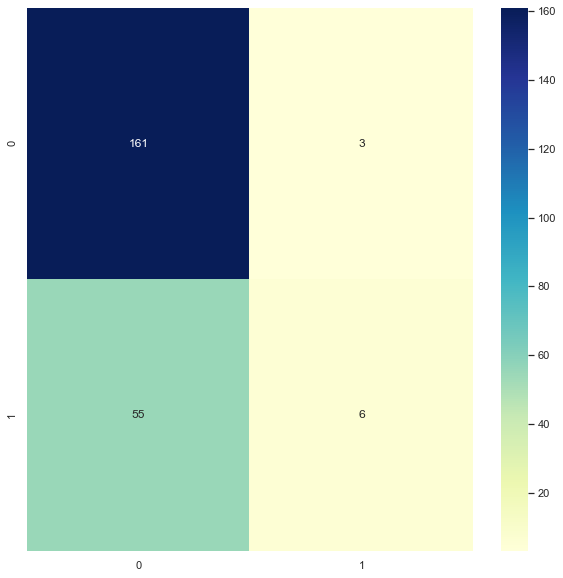

In [46]:
sns.heatmap(cm_log, annot=True, cmap="YlGnBu", fmt="d")

In [47]:
acc_log=accuracy_score(y_test, y_pred_log)

In [48]:
# Performance Measures of LogisticRegression model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.7422222222222222
Precision: 0.6666666666666666
Recall: 0.09836065573770492


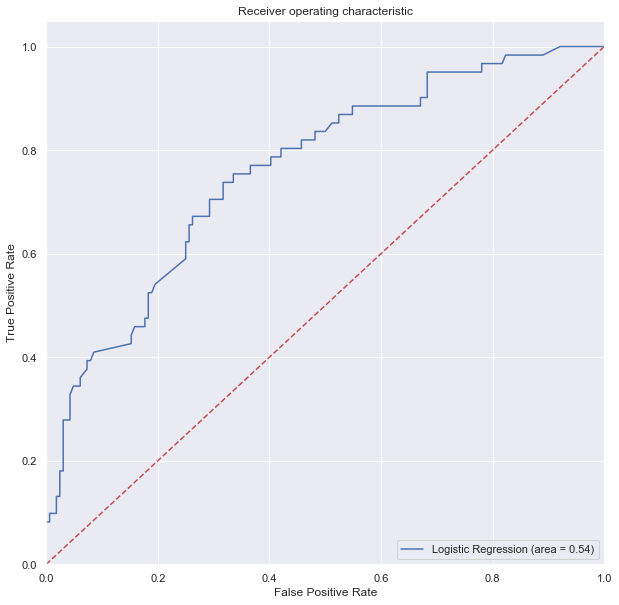

In [49]:
log_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

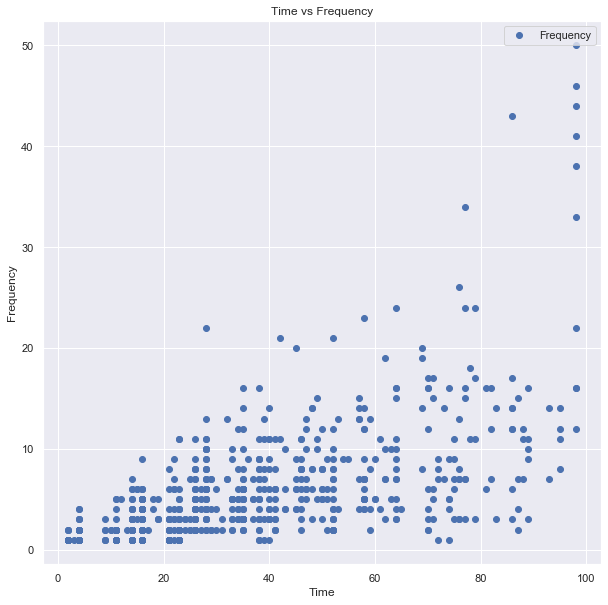

In [51]:
df.plot(x='Time', y='Frequency', style='o')  
plt.title('Time vs Frequency')  
plt.xlabel('Time')  
plt.ylabel('Frequency')  
plt.show()

In [52]:
linx = df['Time'].values.reshape(-1,1)
liny = df['Frequency'].values.reshape(-1,1)

In [53]:
linx_train, linx_test, liny_train, liny_test = train_test_split(linx, liny, test_size=0.3, random_state=0)

In [54]:
lin = LinearRegression()  

In [55]:
lin.fit(linx_train, liny_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(lin.intercept_)
print(lin.coef_)

[0.27787986]
[[0.14899881]]


In [57]:
liny_pred = lin.predict(linx_test)

In [58]:
df1 = pd.DataFrame({'Actual': liny_test.flatten(), 'Predicted': liny_pred.flatten()})
df1

,Actual,Predicted
0,3,4.449847
1,11,6.386831
2,6,2.512862
3,10,4.449847
4,41,14.879763
...,...,...
220,8,7.131825
221,3,10.856795
222,22,4.449847
223,5,5.939835


In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(liny_test, liny_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(liny_test, liny_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(liny_test, liny_pred)))

Mean Absolute Error: 2.9287425957512996
Mean Squared Error: 22.726396672436223
Root Mean Squared Error: 4.767221063936119


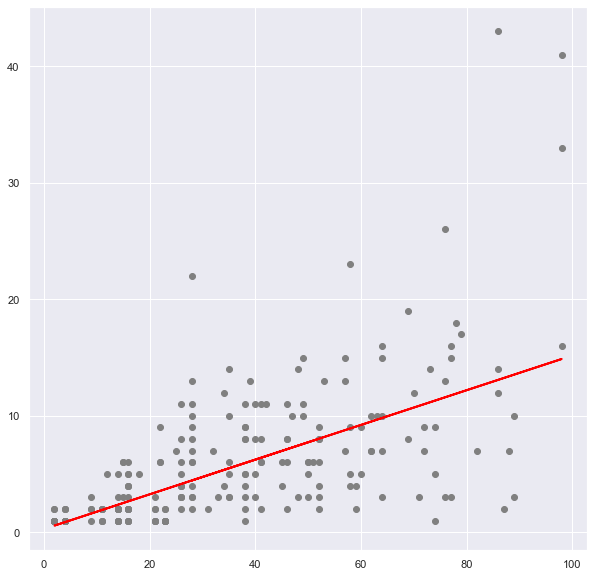

In [60]:
plt.scatter(linx_test, liny_test,  color='gray')
plt.plot(linx_test, liny_pred, color='red', linewidth=2)
plt.show()

In [115]:
import statsmodels.api as sm
x1 = sm.add_constant(linx)
results = sm.OLS(endog = liny, exog=x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     503.9
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.15e-85
Time:                        13:14:38   Log-Likelihood:                -2187.8
No. Observations:                 748   AIC:                             4380.
Df Residuals:                     746   BIC:                             4389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3005      0.285      1.055      0.292      -0.259       0.860
x1             0.1521      0.007     22.448      0.000       0.139       0.165
==============================================================================
Omnibus:                      478.699   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7802.848
Skew:                           2.607   Prob(JB):                         0.00
Kurtosis:                      17.939   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [61]:
polx = df['Time'].values.reshape(-1,1)
poly = df['Frequency'].values.reshape(-1,1)

In [62]:
polx_train, polx_test, poly_train, poly_test = train_test_split(polx, poly, test_size=0.3, random_state=0)

In [63]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
polin = LinearRegression() 
polin.fit(polx, poly) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

In [65]:
pol = PolynomialFeatures(degree = 3) 
x_pol = pol.fit_transform(polx) 

In [66]:
pol.fit(x_pol, poly) 
lin2 = LinearRegression() 
lin2.fit(x_pol, poly) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

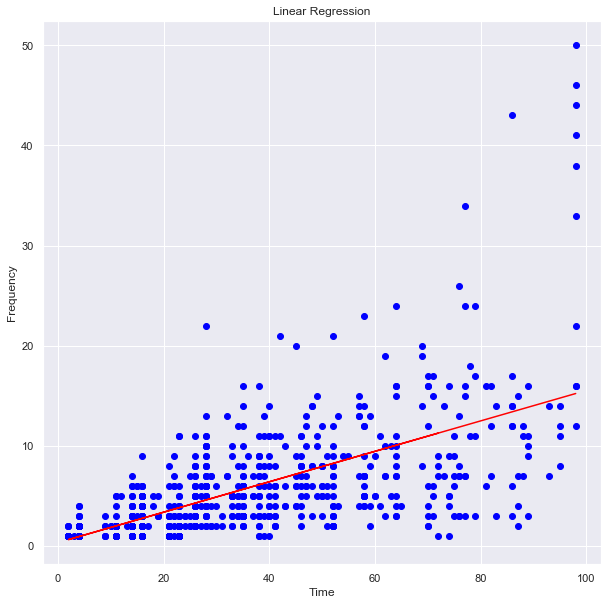

In [67]:
# Visualising the Linear Regression results 
plt.scatter(polx, poly, color = 'blue') 

plt.plot(polx, polin.predict(polx), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Time') 
plt.ylabel('Frequency') 

plt.show() 

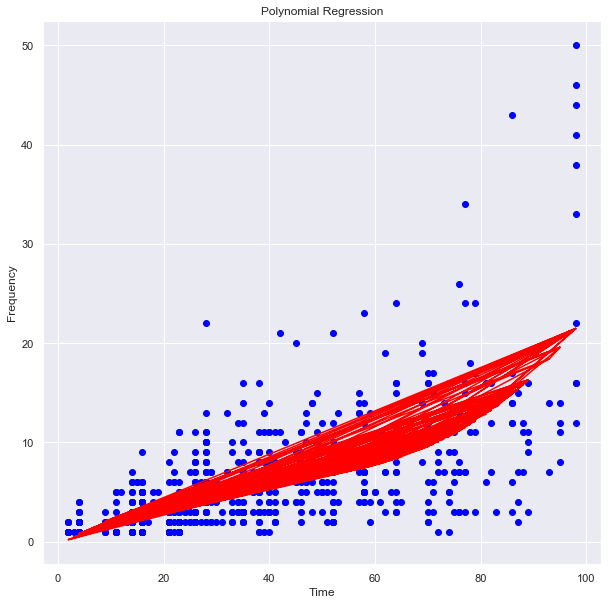

In [68]:
# Visualising the Polynomial Regression results 
plt.scatter(polx, poly, color = 'blue') 

plt.plot(polx, lin2.predict(pol.fit_transform(polx)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Time') 
plt.ylabel('Frequency') 

plt.show() 

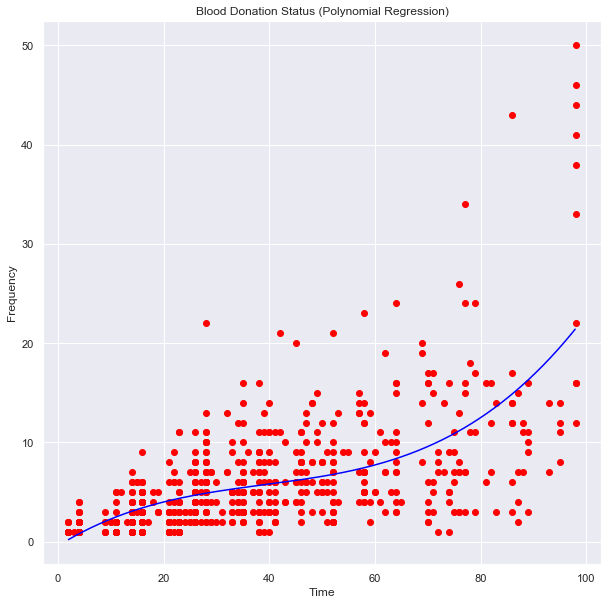

In [69]:
X_grid = np.arange(min(polx), max(polx), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(polx, poly, color = 'red')
plt.plot(X_grid, lin2.predict(pol.fit_transform(X_grid)), color = 'blue')
plt.title('Blood Donation Status (Polynomial Regression)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Classification Analysis

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier()

In [72]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
y_pred_knn = knn.predict(x_test)

In [74]:
# Performance Measures of KNN model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))

Accuracy: 0.7466666666666667
Precision: 0.5588235294117647
Recall: 0.3114754098360656


In [75]:
acc_knn=metrics.accuracy_score(y_test, y_pred_knn)

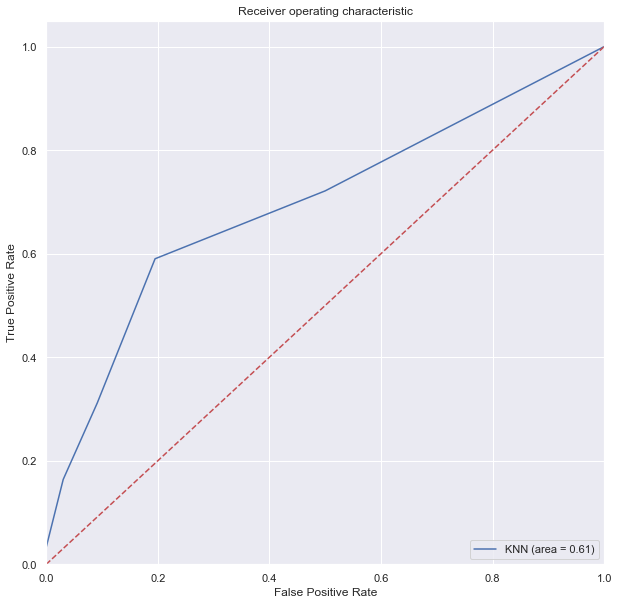

In [76]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dec = DecisionTreeClassifier()

In [79]:
dec.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
y_pred_dec = dec.predict(x_test)

[[137  27]
 [ 45  16]]


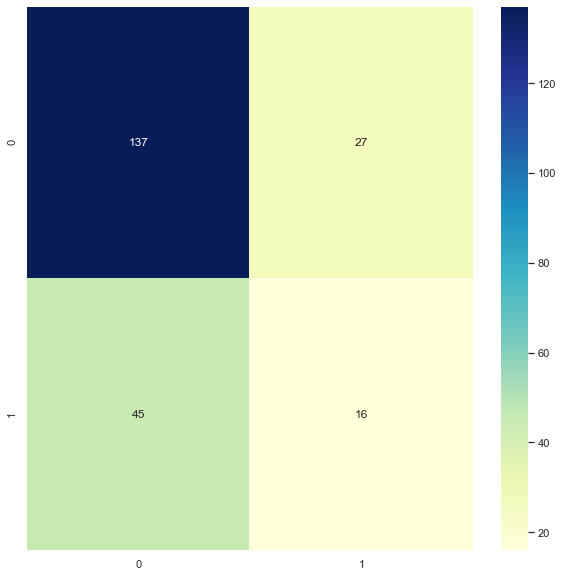

In [81]:
# evaluating model performance by confusion-matrix
cm_dec = confusion_matrix(y_test,y_pred_dec)
print(cm_dec)
sns.heatmap(cm_dec, annot=True, cmap="YlGnBu", fmt="d")

In [82]:
# Performance Measures of Decision Tree model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))
print("Precision:",metrics.precision_score(y_test, y_pred_dec))
print("Recall:",metrics.recall_score(y_test, y_pred_dec))

Accuracy: 0.68
Precision: 0.37209302325581395
Recall: 0.26229508196721313


In [83]:
acc_dec=metrics.accuracy_score(y_test, y_pred_dec)

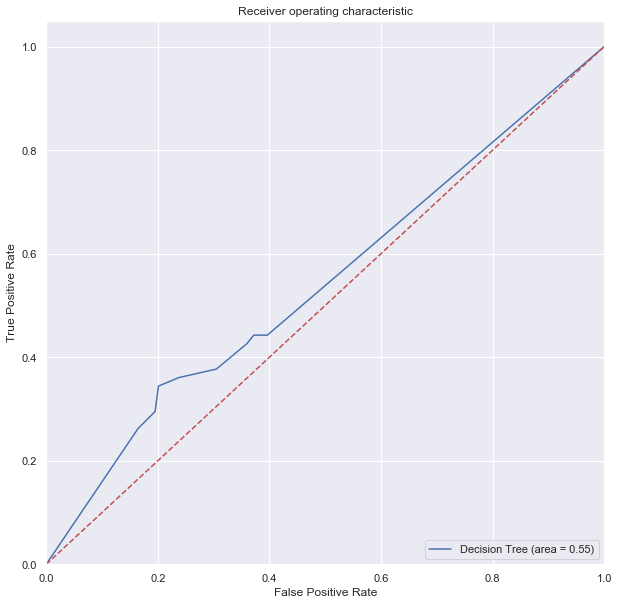

In [84]:
dec_roc_auc = roc_auc_score(y_test, dec.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, dec.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dec_ROC')
plt.show()

# Gaussian Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
gnb = GaussianNB()

In [87]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
y_pred_gnb = gnb.predict(x_test)

[[153  11]
 [ 46  15]]


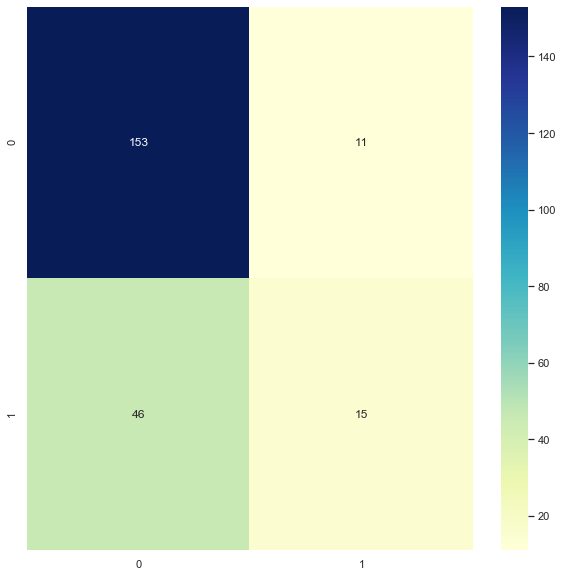

In [89]:
# evaluating model performance by confusion-matrix
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
print(cm_gnb)
sns.heatmap(cm_gnb, annot=True, cmap="YlGnBu", fmt="d")

In [90]:
acc_gnb=accuracy_score(y_test, y_pred_gnb)

In [91]:
# Performance Measures of Naive Bayes model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))
print("Precision:",metrics.precision_score(y_test, y_pred_gnb))
print("Recall:",metrics.recall_score(y_test, y_pred_gnb))

Accuracy: 0.7466666666666667
Precision: 0.5769230769230769
Recall: 0.2459016393442623


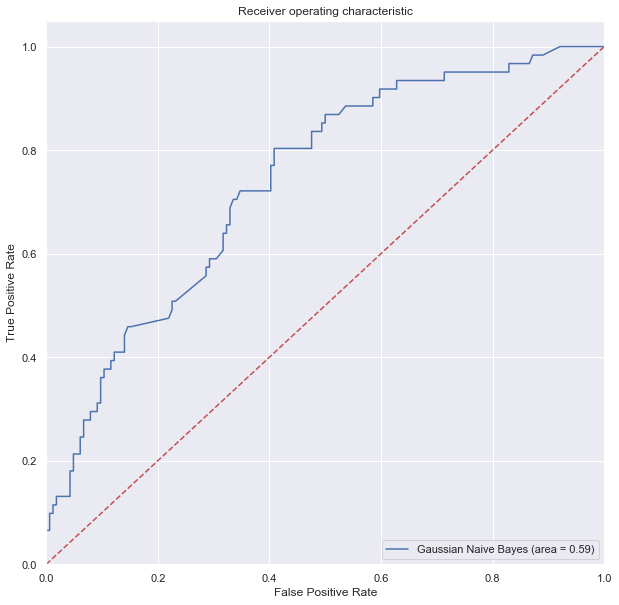

In [92]:
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

# Support Vector Machine

In [93]:
from sklearn.svm import SVC

In [94]:
# creating object of SVC class
svc = SVC(kernel='rbf', random_state=0, gamma='auto')

In [95]:
# fitting the model/ training the model on training data (x_train,y_train)
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
y_pred_svc = svc.predict(x_test)

In [97]:
# evaluating model performance by confusion-matrix
cm_svc = confusion_matrix(y_test,y_pred_svc)
print(cm_svc)

[[162   2]
 [ 58   3]]


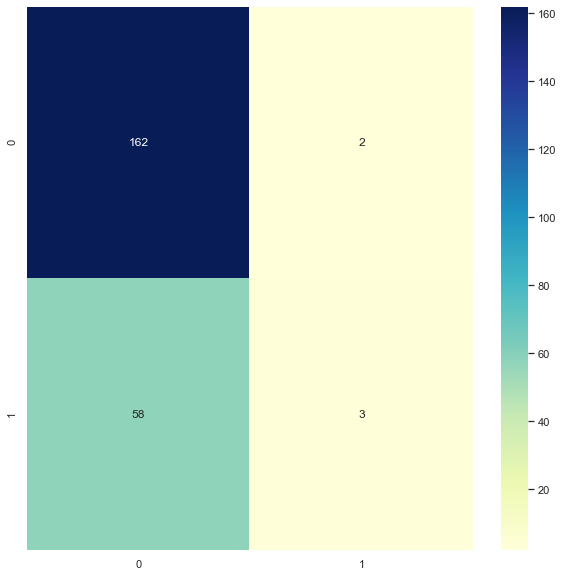

In [98]:
sns.heatmap(cm_svc, annot=True, cmap="YlGnBu", fmt="d")

In [99]:
acc_svc=accuracy_score(y_test, y_pred_svc)

In [100]:
# Performance Measures of SVM model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:",metrics.precision_score(y_test, y_pred_svc))
print("Recall:",metrics.recall_score(y_test, y_pred_svc))

Accuracy: 0.7333333333333333
Precision: 0.6
Recall: 0.04918032786885246


In [101]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [102]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svc)
svc_roc_auc = auc(false_positive_rate, true_positive_rate)
print (svc_roc_auc)

0.5184926029588165


Text(0.5, 0, 'False Positive Rate')

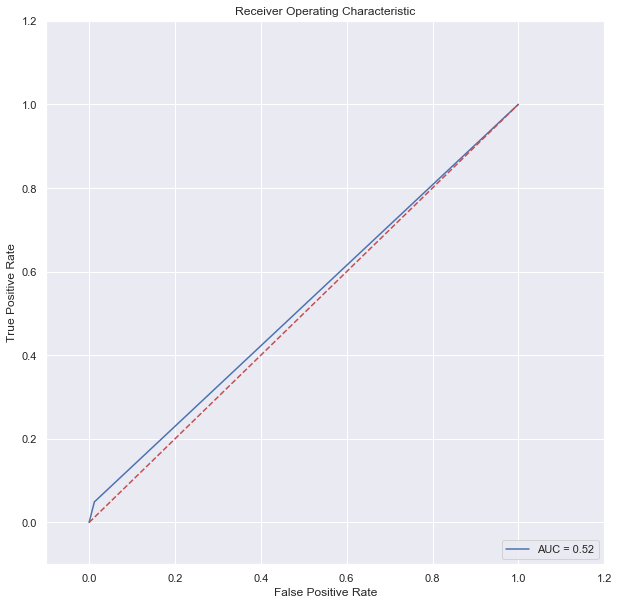

In [103]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% svc_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc=RandomForestClassifier()

In [106]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred_rfc=rfc.predict(x_test)

In [108]:
cm_rfc=confusion_matrix(y_test,y_pred_rfc)

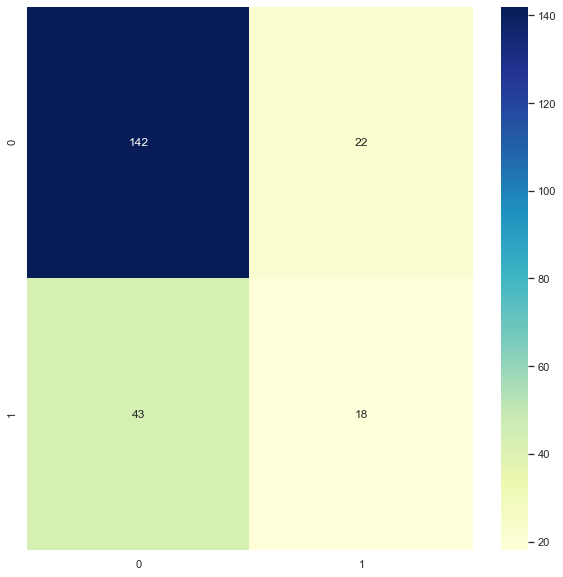

In [109]:
sns.heatmap(cm_rfc, annot=True, cmap="YlGnBu", fmt="d")

In [110]:
acc_rfc=accuracy_score(y_test,y_pred_rfc)

In [111]:
# Performance Measures of Random Forest Classifier model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc))
print("Recall:",metrics.recall_score(y_test, y_pred_rfc))

Accuracy: 0.7111111111111111
Precision: 0.45
Recall: 0.29508196721311475


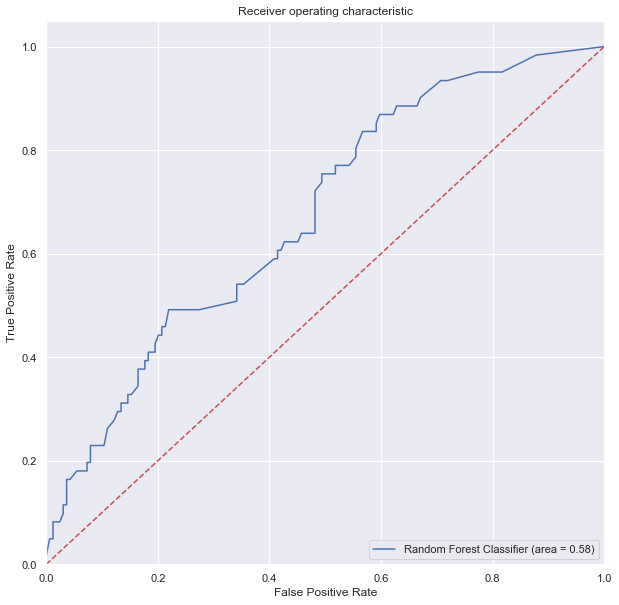

In [112]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rfc_ROC')
plt.show()

# Comparision

In [113]:
models_comparison = [['KNN',acc_knn*100], ['Decision Tree',acc_dec*100], ['SVM',acc_svc*100],['Naive Bayes',acc_gnb*100],
                    ['Random Forest Classifier',acc_rfc*100],['Logistic Regression',acc_log*100]]
models_compaison_df = pd.DataFrame(models_comparison,columns=['Model','% Accuracy'])
a = models_compaison_df.sort_values(by ='% Accuracy', ascending = False) 
a

,Model,% Accuracy
0,KNN,74.666667
3,Naive Bayes,74.666667
5,Logistic Regression,74.222222
2,SVM,73.333333
4,Random Forest Classifier,71.111111
1,Decision Tree,68.000000


Text(0.5, 0, 'Model')

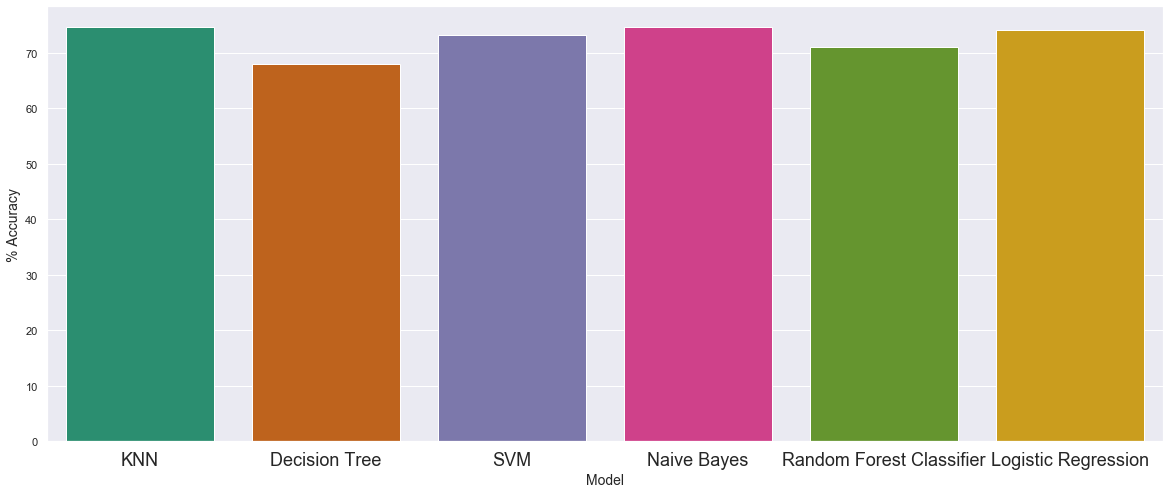

In [114]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',y='% Accuracy',data=models_compaison_df,palette='Dark2')
plt.xticks(size=18)
plt.ylabel('% Accuracy',size=14)
plt.xlabel('Model',size=14)